In [ ]:
!brew install tesseract


In [ ]:
%pip install pytesseract

[INFO] Preprocessing image...
[INFO] Extracting text...
[INFO] Cleaning up extracted text...
[INFO] Extracting text with bounding boxes...


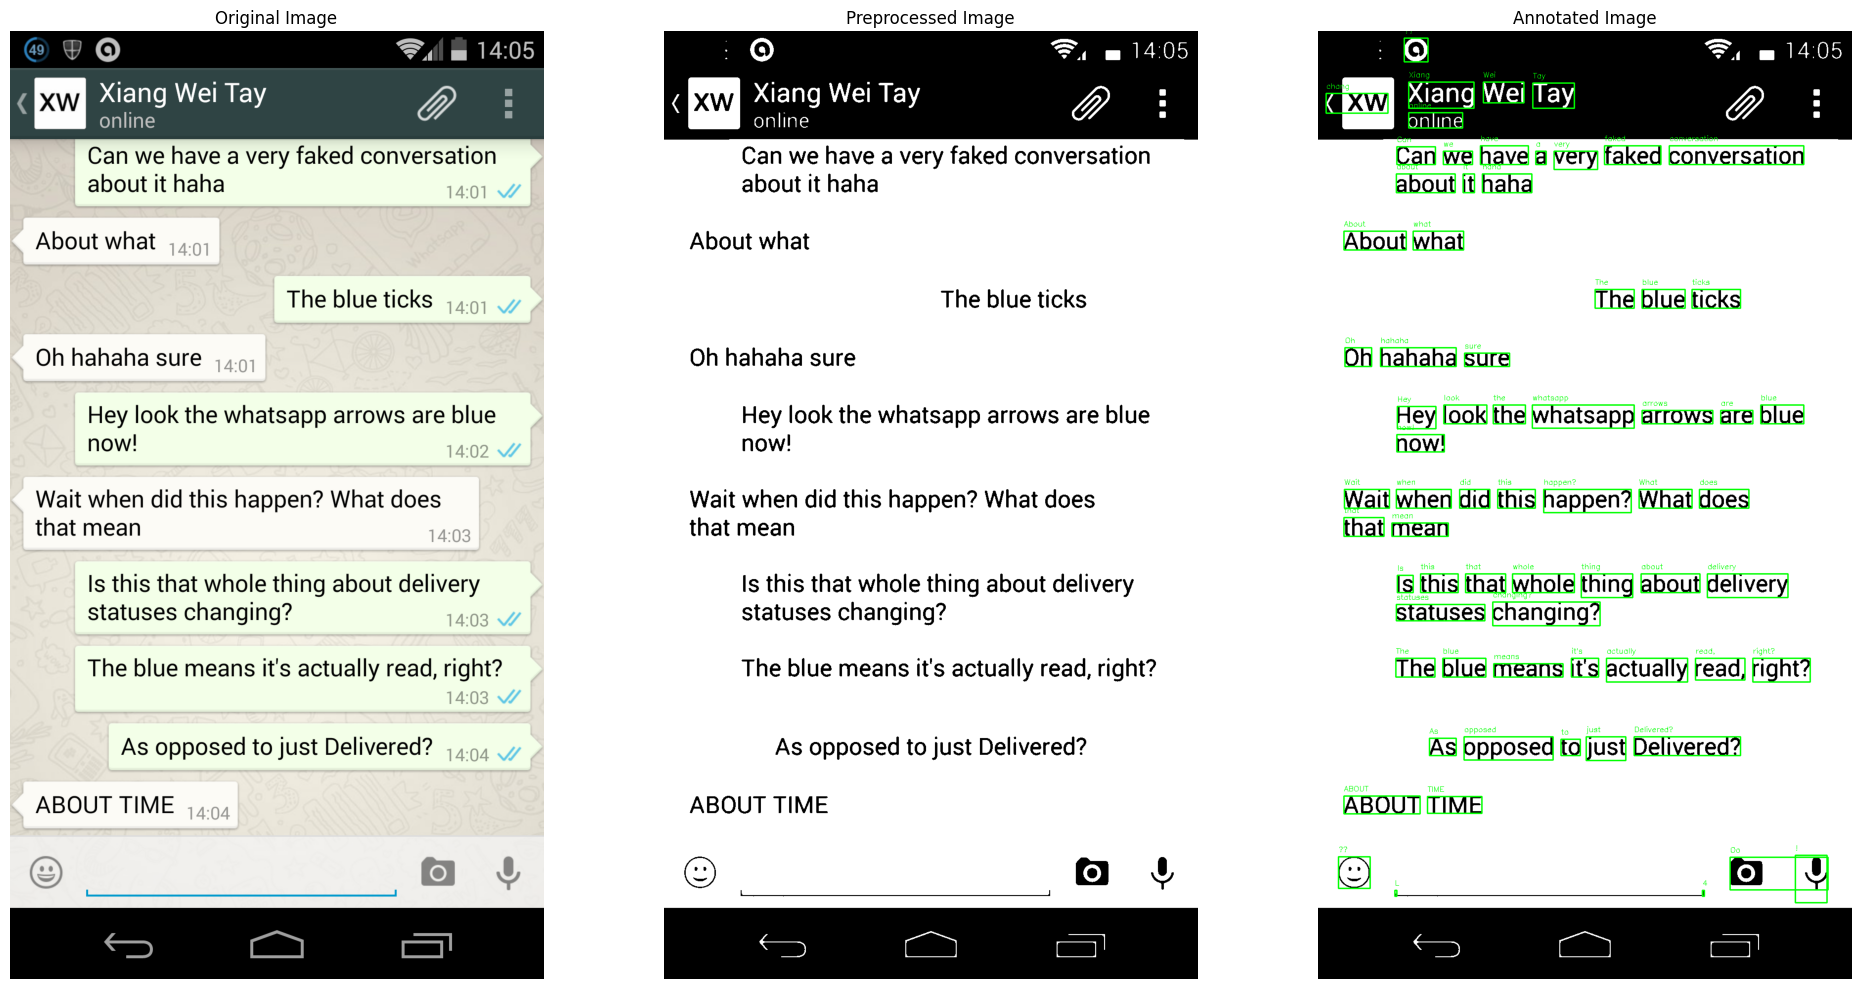


[INFO] Extracted Text:

chang Xiang Wei Tay online Can we have a very faked conversation about it haha About what The blue ticks Oh hahaha sure Hey look the whatsapp arrows are blue now Wait when did this happen What does that mean Is this that whole thing about delivery statuses changing The blue means its actually read right As opposed to just Delivered ABOUT TIME Oo L 4
[INFO] Results saved to extracted_text.txt


In [18]:
import cv2
import numpy as np
from pytesseract import pytesseract, Output
from skimage.filters import threshold_sauvola
import re
import matplotlib.pyplot as plt

pytesseract.tesseract_cmd = "/usr/local/bin/tesseract"

def load_image(image_path):
    """Load an image from a file."""
    return cv2.imread(image_path)


def preprocess_image(image):
    """Preprocess the image for better OCR results."""
    print("[INFO] Preprocessing image...")
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Adaptive Thresholding (Gaussian)
    _,binary_image = cv2.threshold(blurred_image,150,255, cv2.THRESH_BINARY)
    
    return binary_image


def extract_text(image):
    """Extract text from an image using Tesseract."""
    print("[INFO] Extracting text...")
    text = pytesseract.image_to_string(image)
    return text


def extract_text_with_boxes(image):
    """Extract text along with bounding boxes for visual feedback."""
    print("[INFO] Extracting text with bounding boxes...")
    details = pytesseract.image_to_data(image, output_type=Output.DICT)

    # Annotate detected text on the image
    annotated_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i in range(len(details['text'])):
        if details['text'][i].strip():
            x, y, w, h = (details['left'][i], details['top'][i], details['width'][i], details['height'][i])
            cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(annotated_image, details['text'][i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return annotated_image, details


def postprocess_text(text):
    """Clean up the extracted text."""
    print("[INFO] Cleaning up extracted text...")
    cleaned_text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # Remove extra spaces and newlines
    return cleaned_text


def visualize_with_matplotlib(original, preprocessed, annotated, text):
    """Display images and extracted text using Matplotlib."""
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    # Original Image
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Preprocessed Image
    axes[1].imshow(preprocessed, cmap="gray")
    axes[1].set_title("Preprocessed Image")
    axes[1].axis("off")

    # Annotated Image
    axes[2].imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Annotated Image")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

    # Display Extracted Text
    print("\n[INFO] Extracted Text:\n")
    print(text)


def save_results(text, output_path="extracted_text.txt"):
    """Save the extracted text to a file."""
    with open(output_path, 'w') as file:
        file.write(text)
    print(f"[INFO] Results saved to {output_path}")


if __name__ == "__main__":
    # Input image path
    input_image_path = "WhatsApp.png"  # Replace with your image path

    # Load the image
    original_image = load_image(input_image_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(original_image)

    # Extract text
    extracted_text = extract_text(preprocessed_image)

    # Postprocess text
    cleaned_text = postprocess_text(extracted_text)

    # Extract text with bounding boxes
    annotated_image, details = extract_text_with_boxes(preprocessed_image)

    # Visualize results using Matplotlib
    visualize_with_matplotlib(original_image, preprocessed_image, annotated_image, cleaned_text)

    # Save results
    save_results(cleaned_text, "extracted_text.txt")
